**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt number of adjustment year](#toc3_1_)    
    - 3.1.1. [Effect on government](#toc3_1_1_)    
    - 3.1.2. [Effect on households](#toc3_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Government spending shock - further comments

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
sol = model.sol

In [4]:
parameter = 'eta'
parvalues = [0.1,0.2,0.3]
models = model.multi_model(parameter,parvalues)

Jacobian calculated in 1.0 mins 2 secs
Jacobian calculated in 26.6 secs
Jacobian calculated in 26.5 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

In [5]:
Tshock = 50                                                 # length of shock
persistence = 0.50**np.arange(Tshock)                       # persistence of shock

In [6]:
for model_ in models:

    model_.set_exo_ss()                                         # set steady state exogenous variables
    model_.set_unknowns_ss()                                    # set steady state unknown variables                                
    model_.sol.G[:Tshock] = model_.ss.G*(1+0.01*persistence)    # shock to government spending
    model_.find_IRF()                                           # find impulse response functions

initial:
t1-t0 = 0.01299 secs
it = 3
    max. abs. error = 6.13e-11
    4.99e-13 in A_R_ini_error
    2.20e-13 in Aq_diff
    5.51e-13 in FOC_capital_agency
    7.67e-12 in FOC_K_ell
    6.13e-11 in mkt_clearing
    2.00e-12 in PC

solve: t1-t0 = 0.08577 secs
evaluate + update: t3-t2 = 0.04488 secs
initial:
t1-t0 = 0.01097 secs
it = 3
    max. abs. error = 2.76e-11
    8.46e-13 in A_R_ini_error
    2.09e-13 in Aq_diff
    5.78e-13 in FOC_capital_agency
    8.51e-13 in FOC_K_ell
    2.76e-11 in mkt_clearing
    1.43e-12 in PC

solve: t1-t0 = 0.09175 secs
evaluate + update: t3-t2 = 0.04488 secs
initial:
t1-t0 = 0.01098 secs
it = 3
    max. abs. error = 3.12e-11
    1.52e-12 in A_R_ini_error
    1.62e-13 in Aq_diff
    5.06e-13 in FOC_capital_agency
    9.83e-13 in FOC_K_ell
    3.12e-11 in mkt_clearing
    3.21e-12 in PC

solve: t1-t0 = 0.08577 secs
evaluate + update: t3-t2 = 0.04887 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt number of adjustment year](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Effect on government](#toc0_)

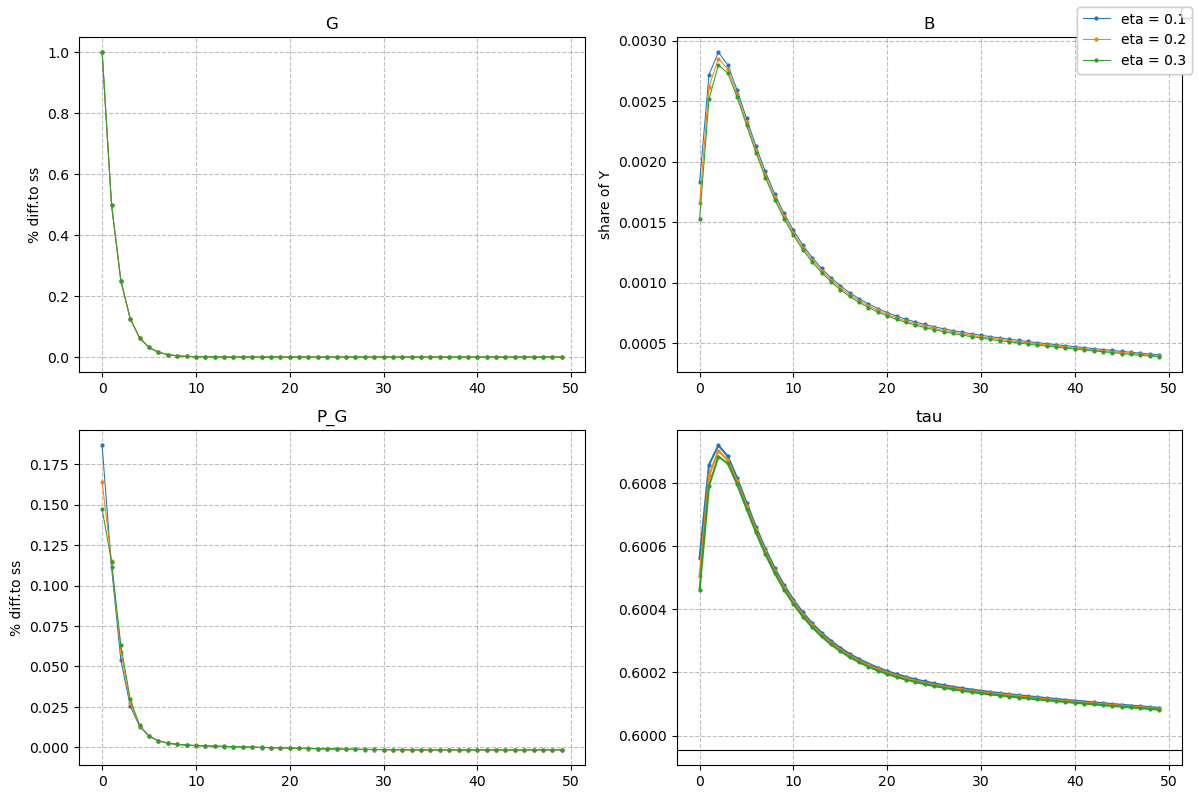

In [7]:
model.plot_IRF_models(models,parameter,varlist=['G','B','P_G','tau'],abs=['tau'],Y_share=['B'],ncol=2)

#### 4.2.2. <a id='toc4_2_2_'></a>[Effect on Phillips-curve](#toc0_)

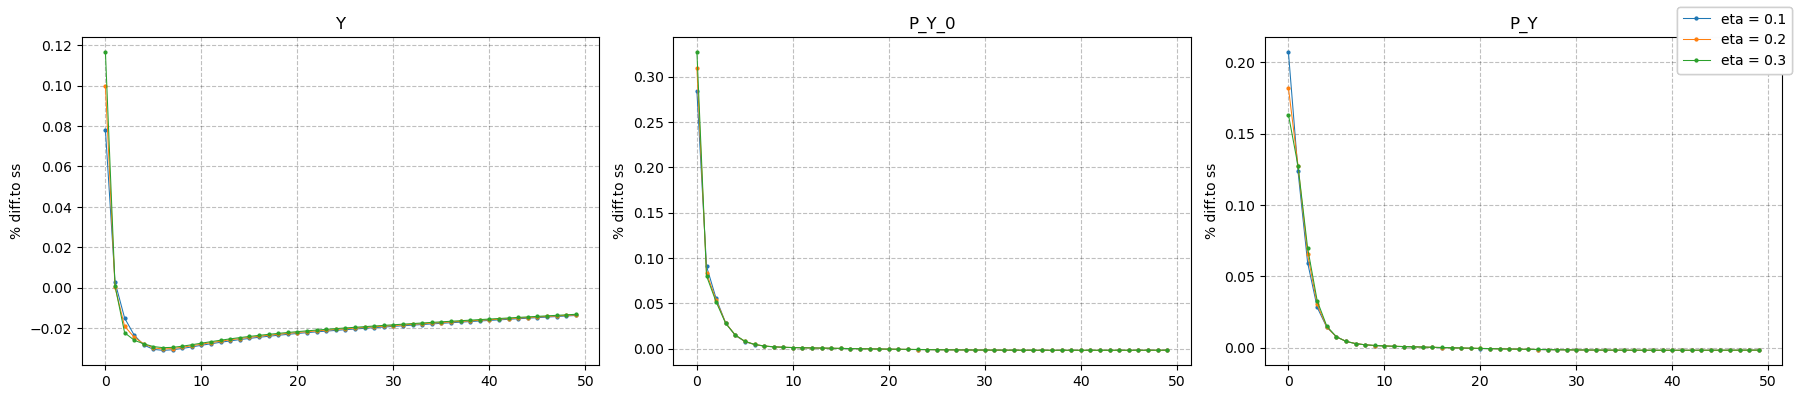

In [8]:
model.plot_IRF_models(models,parameter,varlist=['Y','P_Y_0','P_Y'])

#### 3.1.2. <a id='toc3_1_2_'></a>[Effect on households](#toc0_)

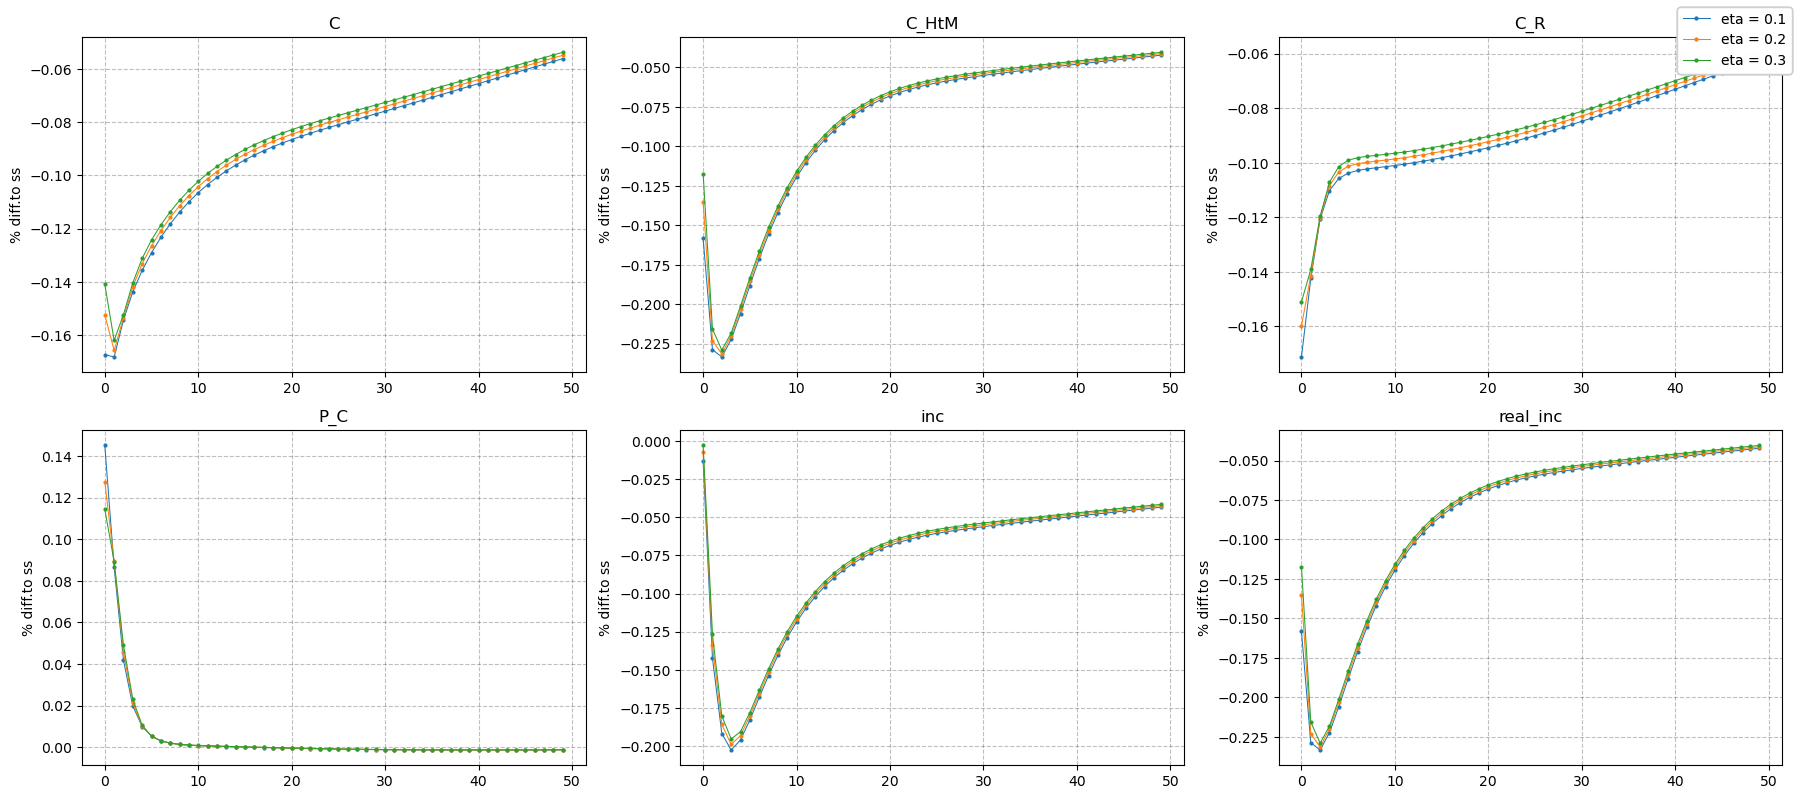

In [9]:
model.plot_IRF_models(models,parameter,varlist=['C','C_HtM','C_R','P_C','inc','real_inc'],ncol=3)

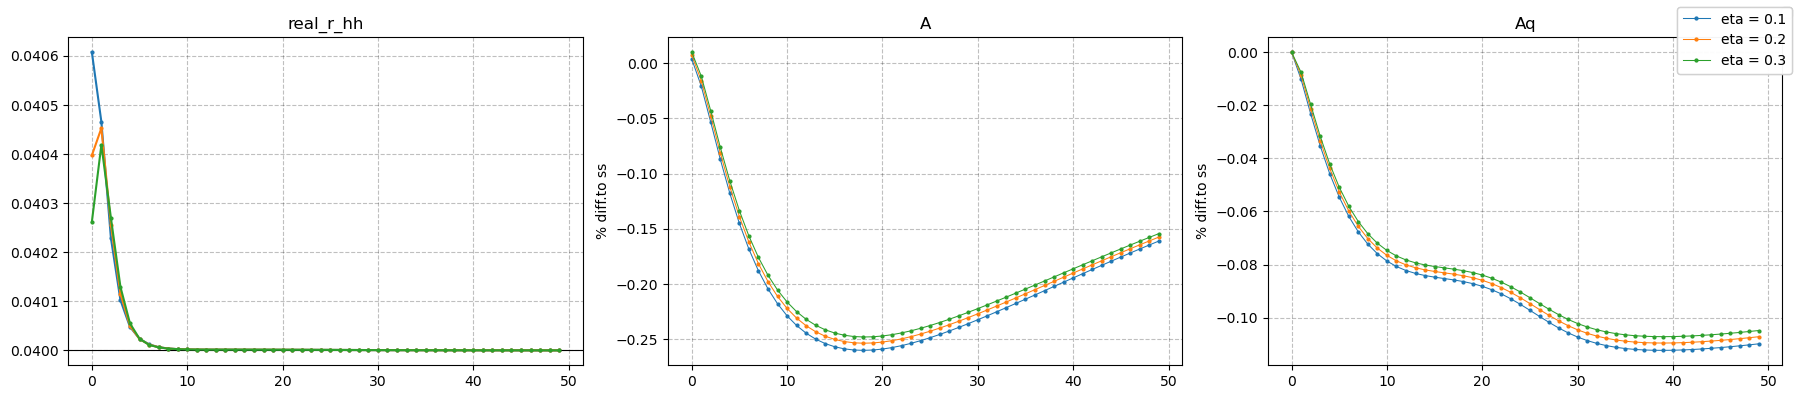

In [10]:
model.plot_IRF_models(models,parameter,varlist=['real_r_hh','A','Aq'],ncol=3,abs=['real_r_hh'])